<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Directions-for-homework-submission" data-toc-modified-id="Directions-for-homework-submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Directions for homework submission</a></span></li><li><span><a href="#Order-of-Magnitude-Neuroscience:-Your-memory-storage-(10-pt)" data-toc-modified-id="Order-of-Magnitude-Neuroscience:-Your-memory-storage-(10-pt)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Order of Magnitude Neuroscience: Your memory storage (10 pt)</a></span></li><li><span><a href="#Hopfield-network-(70-pt)" data-toc-modified-id="Hopfield-network-(70-pt)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hopfield network (70 pt)</a></span><ul class="toc-item"><li><span><a href="#Construct-the-weights-(5-pt)" data-toc-modified-id="Construct-the-weights-(5-pt)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Construct the weights (5 pt)</a></span></li><li><span><a href="#Iterations-(20-pt)" data-toc-modified-id="Iterations-(20-pt)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Iterations (20 pt)</a></span></li><li><span><a href="#Inverse-memory-(5-pt)" data-toc-modified-id="Inverse-memory-(5-pt)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Inverse memory (5 pt)</a></span></li><li><span><a href="#Multiple-memories-(20-pt)" data-toc-modified-id="Multiple-memories-(20-pt)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Multiple memories (20 pt)</a></span></li><li><span><a href="#Different-weights-(20-pt)" data-toc-modified-id="Different-weights-(20-pt)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Different weights (20 pt)</a></span></li></ul></li></ul></div>

# Directions for homework submission

Submit each of your homework to canvas as the pdf output of the jupyter notebook, and the jupyter notebook (.ipynb). Name your files starting in the format of "Last_name_First_name_File_name" separated by underscores. 

For example, Jieyu submits two files for her homework this week: 
1. Zheng_Jieyu_HW1.pdf (the pdf output of the jupyter notebook)
    
    If you have problems rendering your notebook into pdf, you can open your notebook in a browser and print -> save as pdf. 

2. Zheng_Jieyu_HW1.ipynb

**Please make sure your notebook can be run without errors within the cns187 virtual environment.** Any file that fails to be executed on TA's end will be considered as late submissions. 

**Caltech Honor code:** Searching for the solutions online is strictly prohibited. You should refer to the textbooks and lecture slides. If you are citing any external sources online, please include a list of references. 

**Collaboration on homework assignments is encouraged.** However, **you cannot show each other the numerical answers or codes**. Please note at the beginning of each answer whom you have discussed the problems with (including TAs). 

**All the mathematics should be typed in Latex format.** You may work on a piece of paper and then type it into the notebook. Here is a useful [cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf). Please do not submit pictures of handwritten maths. 

**For the schematic and drawings to be submitted,** please display the images in markdown cells in your homework amd make sure they show up in your pdf rendering. 

**Please make sure that all your plots include a title and axis labels with units.** **One point will be deducted for each missing element.**

------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Order of Magnitude Neuroscience: Your memory storage (10 pt)

Based on the lectures and homework assignments we have covered so far, estimate how much information the human brain may need to store over a lifetime. What type of storage device do you need for your lifetime memory? Cite any references that you need. 

Hint: Not all sensory inputs get stored. What is a good estimate for the information rate of perception? Recall a few examples we have covered in HW4. 



It was calculated in HW4 that human actions had information rates on the order of 10 bits/s so if we take the life expectancy of humans to be 80 years old then: $$80\text{ years} \approx 31536000\text{ seconds}$$ 

This means that humans need about $3 \times 10^8$ bits of storage for lifetime memory which is smaller than a usb drive.

# Hopfield network (70 pt)

(1) A Hopfield associative memory network has activities for individual units, $v_a$ for $a = 1,2,\dots,N$ (or collectively $\mathbf v$), that take values of either +1 or −1, and are updated at every discrete time step of the network dynamics by the following rule: 

\begin{align}
v_a \left( t + 1 \right) = \text{sgn} \left(\sum_{a'=1}^{N} M_{a a'} v_{a'} \left( t \right) \right) \tag{1}
\end{align} 

where

\begin{align}
\text{sgn} \left(z \right) = \left\{ \begin{array}{rcl}
+1 & \mbox{if}
& z \geqslant 0 \\ -1 & \mbox{if} & z <0. \\ 
\end{array}\right.
\end{align}

Here $M$ is a matrix constructed from $P$ “memory” vectors $\mathbf{v}^m (m = 1, 2,\dots,P)$, also composed of elements that are either +1 or −1, through the sum of outer products

\begin{align}
 M_{a a'} = \left( 1− \delta_{a a'} \right) \sum_{m=1}^{P} v_a^m v_{a′}^m. \tag{2}
\end{align}

Here $\delta_{ij}$ is the Kronecker delta. Note that the diagonal elements of $\mathbf{M}$ are set to zero by this equation.

## Construct the weights (5 pt)
Consider a 100-element network $(N = 100)$. Start with a single memory state, $P=1$. Construct that state by randomly assigning +1 and −1 values with equal probabilities to the $N$ elements of $\mathbf{v}^1$. Set the matrix of synaptic weights according to equation 2. 

In [18]:
n = 100
v1 = np.random.choice([-1, 1], n)
kron = np.zeros(shape=(n,n))
np.fill_diagonal(kron, 1.0)
M = np.array([[v1[i] * v1[j] for i in range(n)] for j in range(n)])
M = (1 - kron)*M

## Iterations (20 pt)
Study the behavior of the network by iterating equation 1. To measure how close the state of the network at time $t$, $\mathbf{v}(t)$, is to a particular memory state, define the overlap function by the scalar product

$$q(t) = \frac{1}{N} \mathbf{v}(t) \cdot \mathbf{v}^m$$. 

(Hint: This is equivalent to 1 if $\mathbf{v}(t) = \mathbf{v}^m$, is near zero if $\mathbf{v}(t)$ is unrelated to $\mathbf{v}^m$, and is equal to −1 if  $\mathbf{v}(t) = -\mathbf{v}^m$.)

Make the following two plots: 

1. Plot $\mathbf{v}(t)$ at each iteration in an $N \times T$ matrix. Here $T$ is the number of iterations. Choose a reasonable $T$ value so $\mathbf{v}(t)$ stablizes but $T$ is not too large. 

2. plot $q(t)$ as the network evolves from this state according to equation 1. Final values of $q(t)$ near one indicate successful recovery of the memory. 

In this question, set the initial state $\mathbf{v}(0)$, so that it has a positive overlap, $q(0)$, with the memory state $\mathbf{v}^1$.

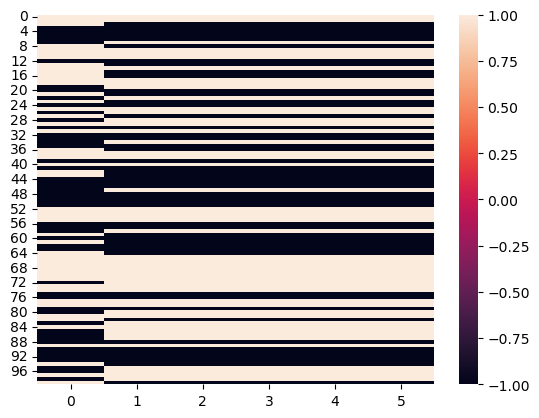

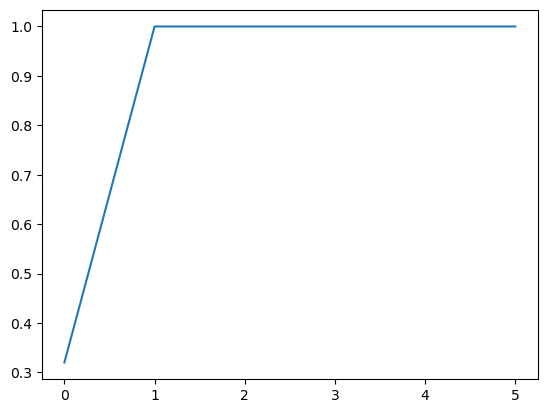

In [35]:
T = 5
v_0 = np.random.choice([-1, 1], n)
while np.sum(v_0 == v1) < int(0.65 * n) or np.sum(v_0 == v1) > int(0.75 * n):
    v_0 = np.random.choice([-1, 1], n)
V_t = np.zeros(shape=(n, T+1))
V_t[:,0] = v_0
q_0 = np.dot(v_0, v1) / n
q_t = np.zeros(T+1)
q_t[0] = q_0
for t in range(T):
    V_t[:, t+1] = [np.sign(np.sum([M[i, j]*V_t[j, t] for j in range(n)])) for i in range(n)]
    q_t[t+1] = np.dot(V_t[:, t+1], v1) / n
    
sns.heatmap(V_t)
plt.show()
plt.plot(q_t)
plt.show()

## Inverse memory (5 pt) 
Do the same starting from $\mathbf{v}(0)$ close to the inverse of the memory state $-\mathbf{v}^1$. What happened? What accounts for this behavior? 

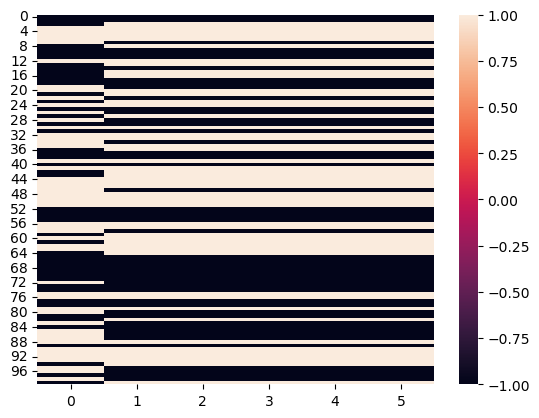

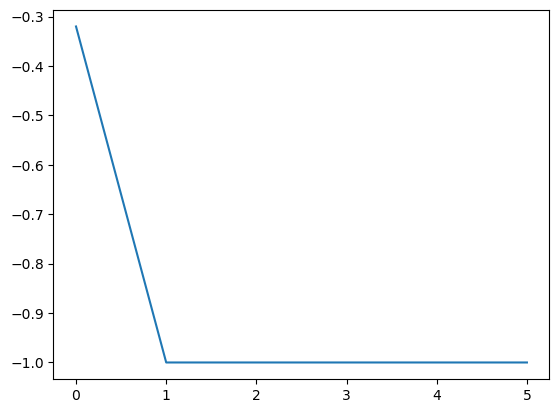

In [36]:
T = 5
v_0 = -v_0
V_t = np.zeros(shape=(n, T+1))
V_t[:,0] = v_0
q_0 = np.dot(v_0, v1) / n
q_t = np.zeros(T+1)
q_t[0] = q_0
for t in range(T):
    V_t[:, t+1] = [np.sign(np.sum([M[i, j]*V_t[j, t] for j in range(n)])) for i in range(n)]
    q_t[t+1] = np.dot(V_t[:, t+1], v1) / n
    
sns.heatmap(V_t)
plt.show()
plt.plot(q_t)
plt.show()

It appears that the memory is inverse in learning and the associative network seems to learn in an opposite direction leading to perfect inverse overlap.

## Multiple memories (20 pt)

Now include multiple memory states, by increasing $P$, and constructing random state vectors $\mathbf{v}^m$ as for $\mathbf{v}^1$ above. For every value of $P$, determine the range of $q(0)$ values that assures successful memory recovery. Include the results you got for $P = 1$ and increase $P$ until memory recovery fails even for $q(0) = 1$. At what $P$ value does this occur? This is a measure of capacity of the network.

In [73]:
def modify_array(arr, match_percent):
    n = arr.size  # Number of elements in the array
    num_match = int(match_percent * n)  # Number of elements to match
    
    # Randomly select indices to match
    match_indices = np.random.choice(n, num_match, replace=False)
    
    # Create a new array with all elements set to 1
    new_arr = np.ones_like(arr)
    
    # Set the elements at match_indices to match the original array
    new_arr[match_indices] = arr[match_indices]
    
    # Set the remaining elements to -1 or 1 randomly
    remaining_indices = np.setdiff1d(np.arange(n), match_indices)
    new_arr[remaining_indices] = np.random.choice([-1, 1], len(remaining_indices))
    
    return new_arr

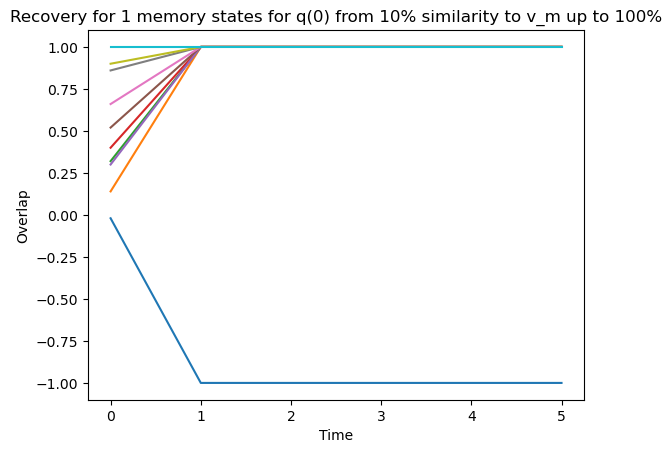

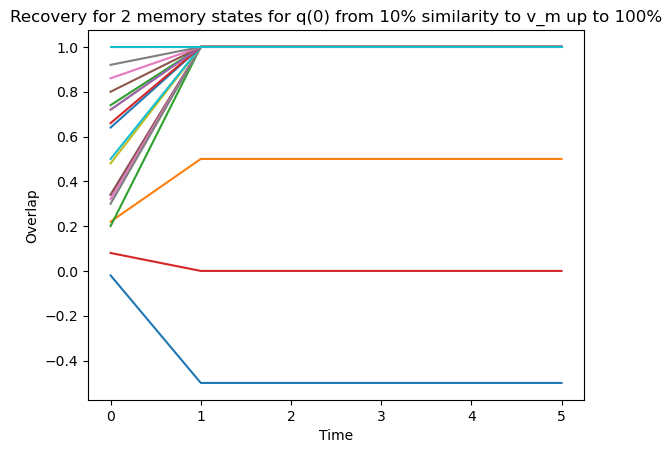

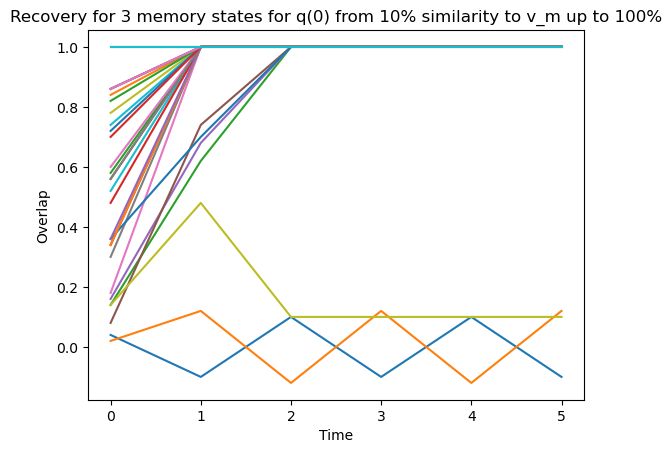

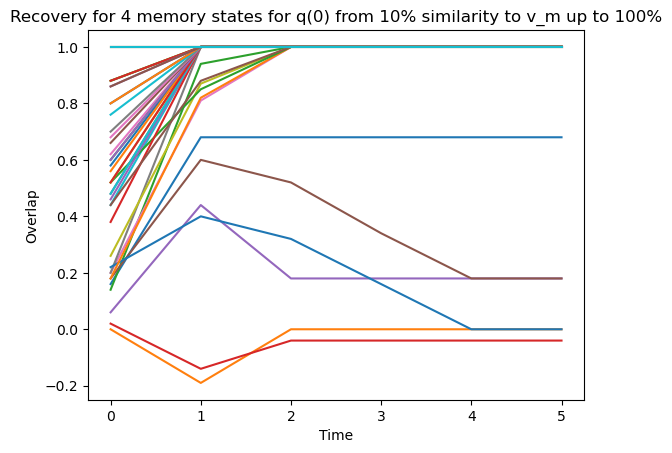

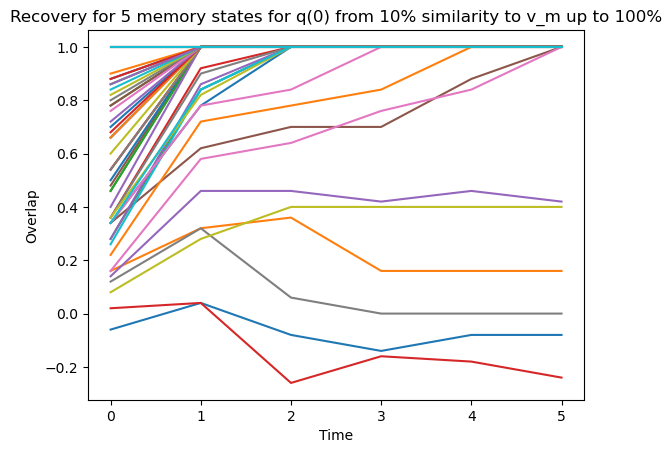

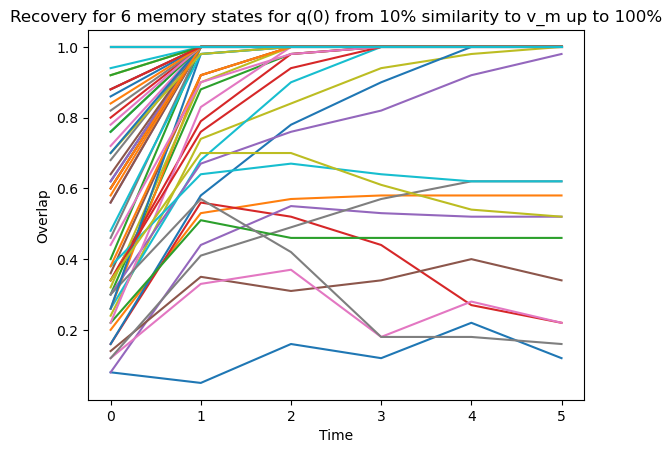

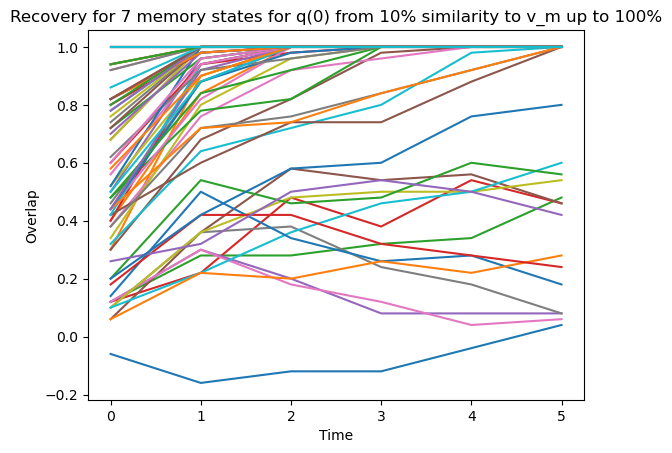

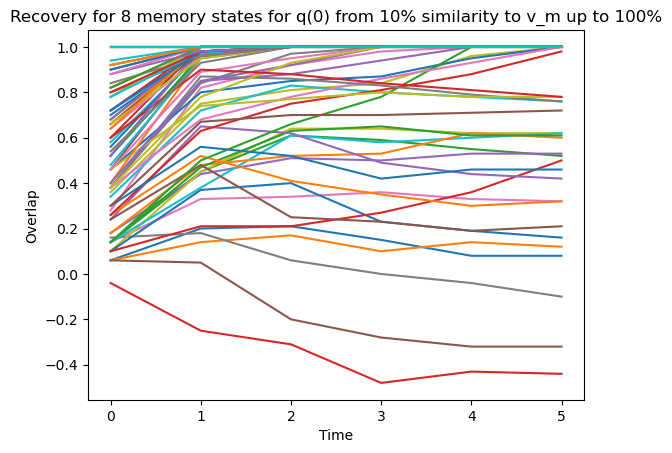

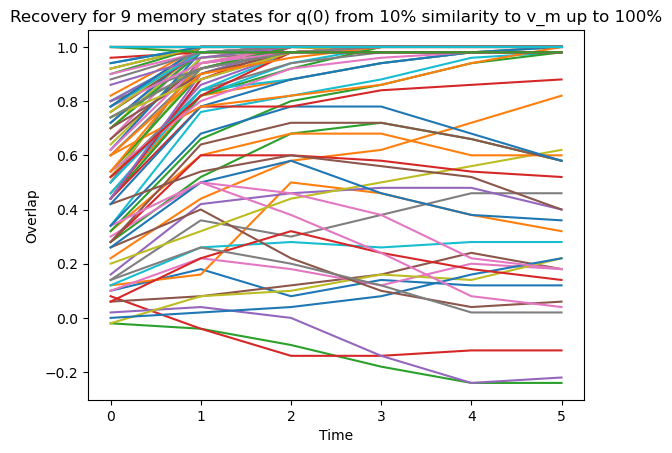

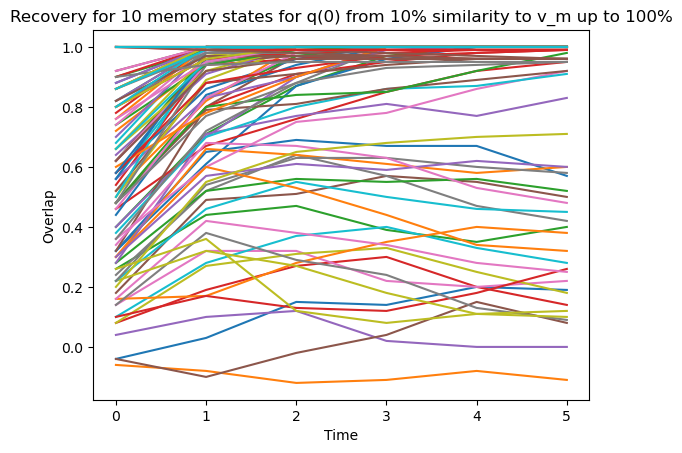

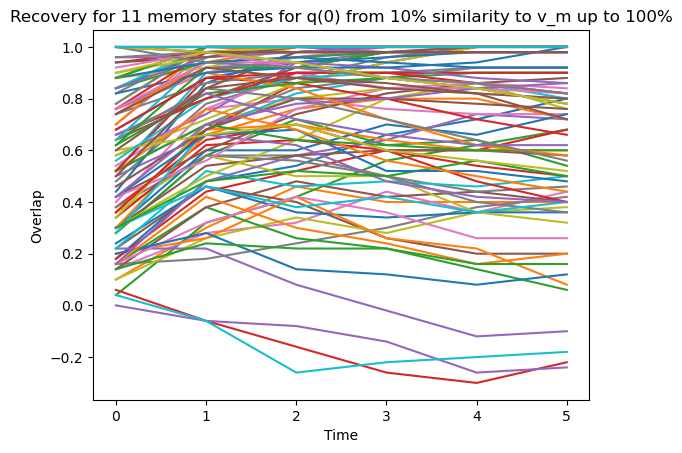

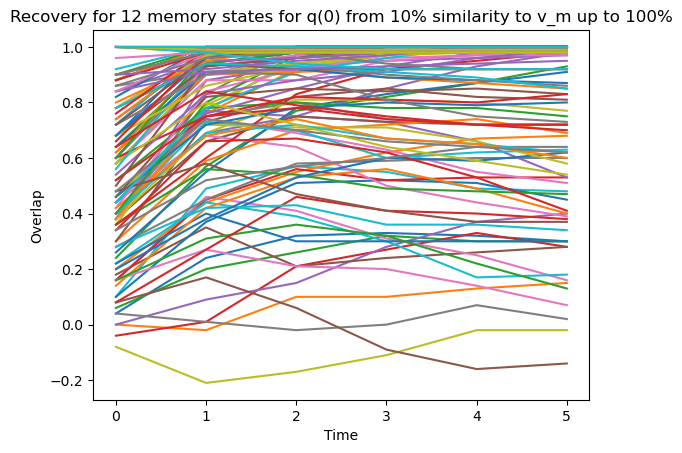

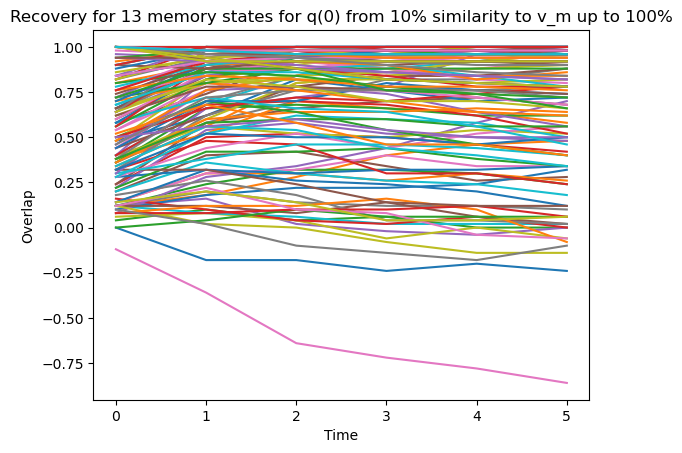

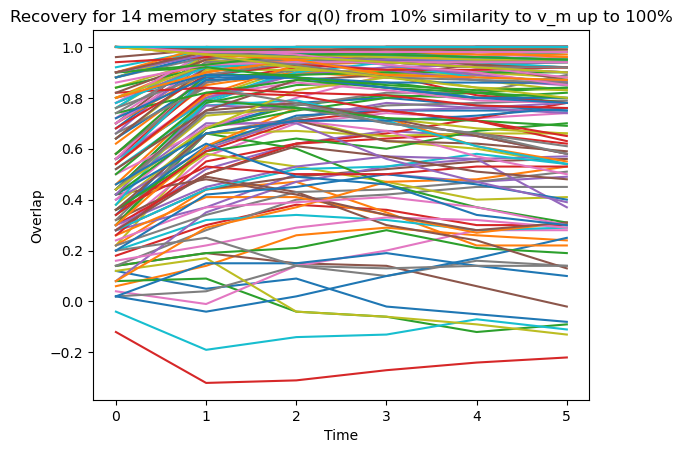

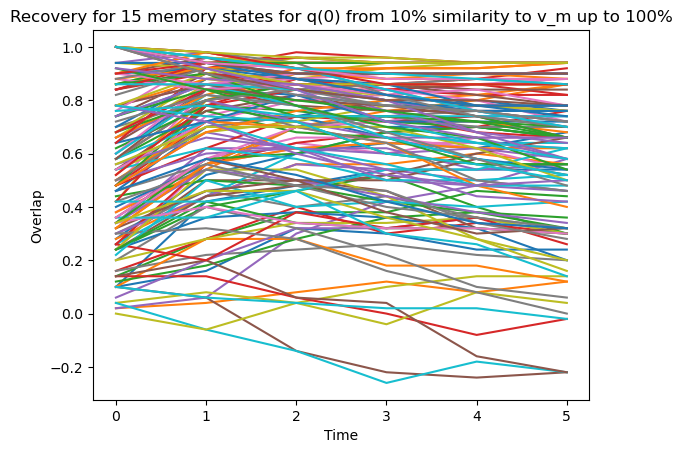

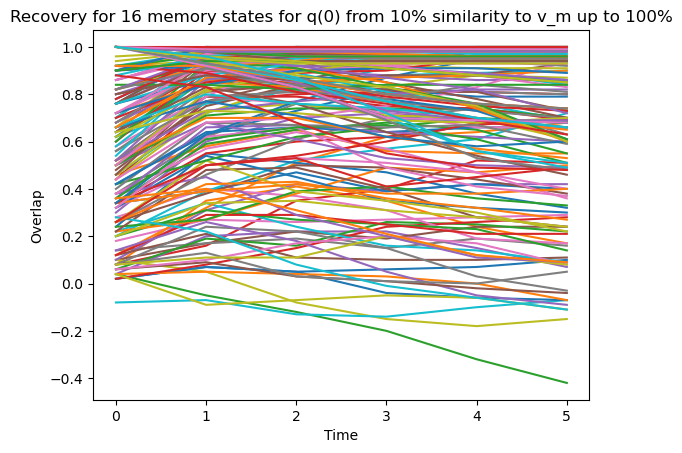

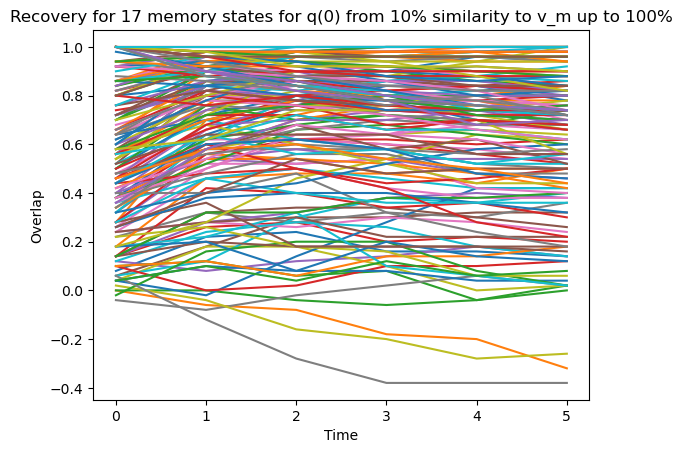

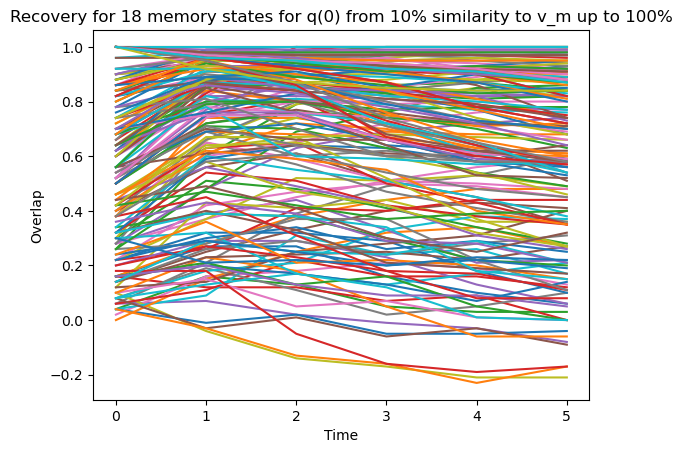

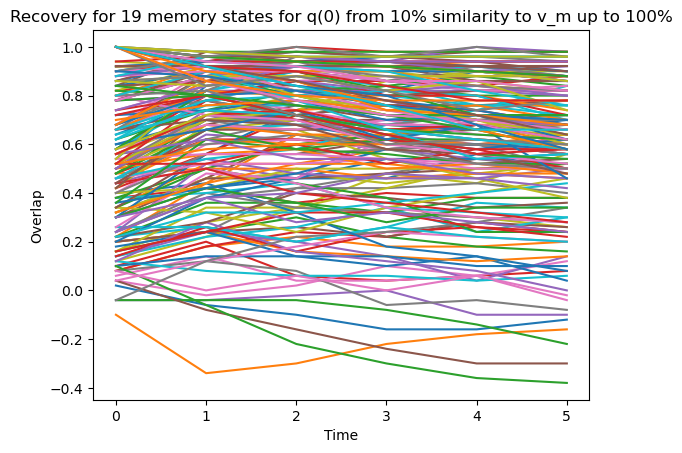

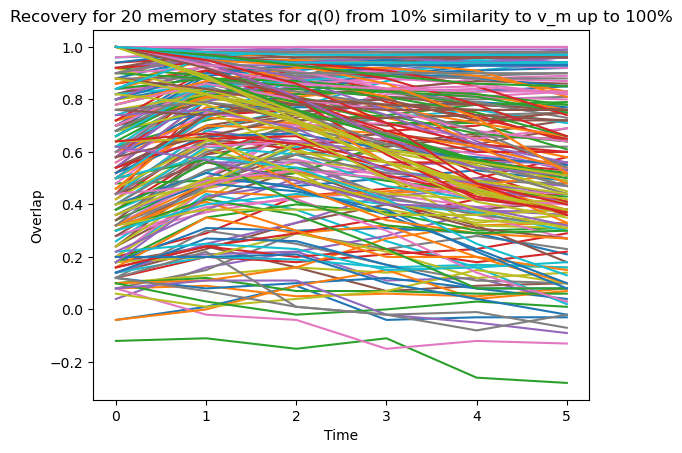

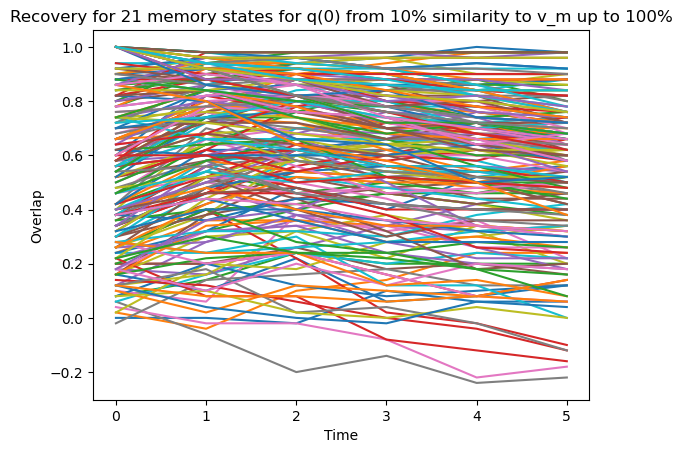

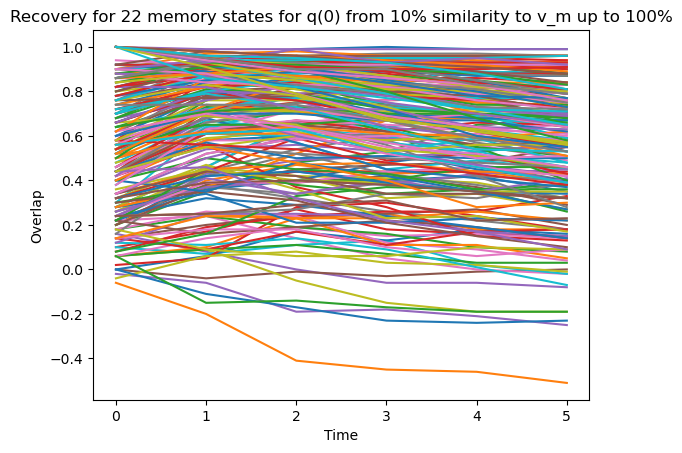

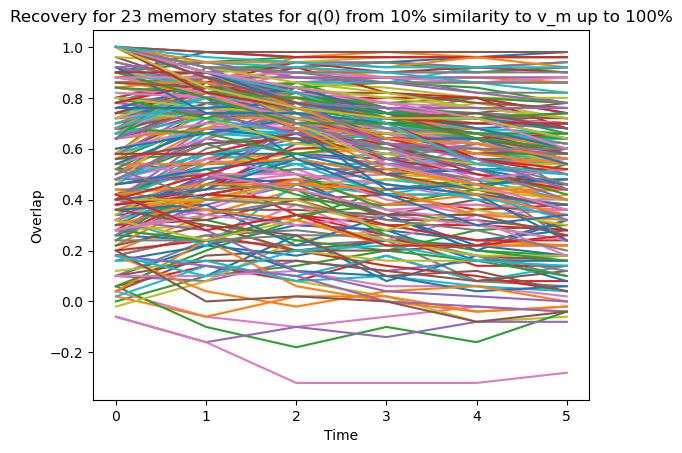

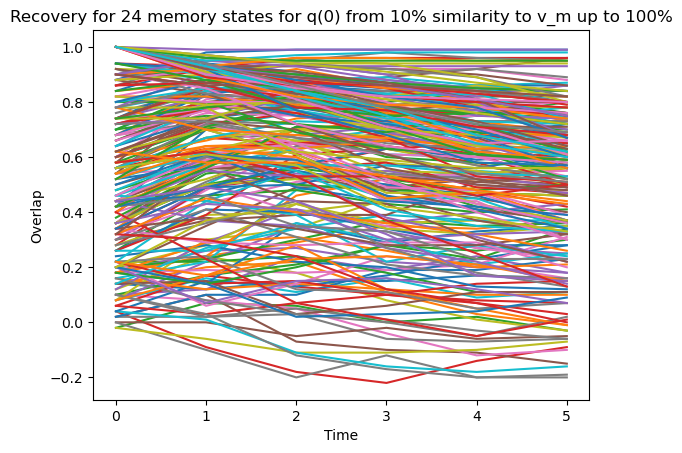

In [80]:
for P in range(1, 25):
    mem_states = np.random.choice([-1, 1], (P,n))
    M = np.array([[np.sum([v_m[i] * v_m[j] for v_m in mem_states]) for i in range(n)] for j in range(n)])
    M = np.sign((1 - kron)*M)
    for match in np.arange(0.1,1.1,0.1):
        q_ts_pos = []
        V_ts_pos = []
        for v_m in mem_states:
            T = 5
            v_0 = modify_array(v_m, match)
            V_t_pos = np.zeros(shape=(n, T+1))
            V_t_pos[:,0] = v_0
            q_0_pos = np.dot(v_0, v_m) / n
            q_t_pos = np.zeros(T+1)
            q_t_pos[0] = q_0_pos
            for t in range(T):
                V_t_pos[:, t+1] = [np.sign(np.sum([M[i, j]*V_t_pos[j, t] for j in range(n)])) for i in range(n)]
                q_t_pos[t+1] = np.dot(V_t_pos[:, t+1], v_m) / n
            q_ts_pos.append(q_t_pos)
            V_ts_pos.append(V_t_pos)
        for i in range(len(q_ts_pos)):
            plt.plot(q_ts_pos[i])
    plt.title(f"Recovery for {P} memory states for q(0) from 10% similarity to v_m up to 100%")
    plt.xlabel("Time")
    plt.ylabel("Overlap")
    plt.show()

It appears that around value of 20-25 for P, even the overlap starting from 1 does not recover. Additionally, it appears that efficient recovery in the states occurs for initial overlap of 0.2-1.0, which can be seen by looking at the smaller state graphs.

## Different weights (20 pt)

Repeat the exercise with the matrix ${\bf{M}}$ replaced by 

\begin{align}
 M_{a a'} = \left( 1− \delta_{a a'} \right) \sum_{m, m'=1}^{P} v_a^m C_{m m'} 
v_{a′}^{m'}. \tag{3}
\end{align}

where $C_{m m'}$ is the $m,m′$ element of the **inverse** of the matrix

\begin{align}
\sum_{a=1}^{N} v_a^m v_{a}^{m'} \tag{4}
\end{align}

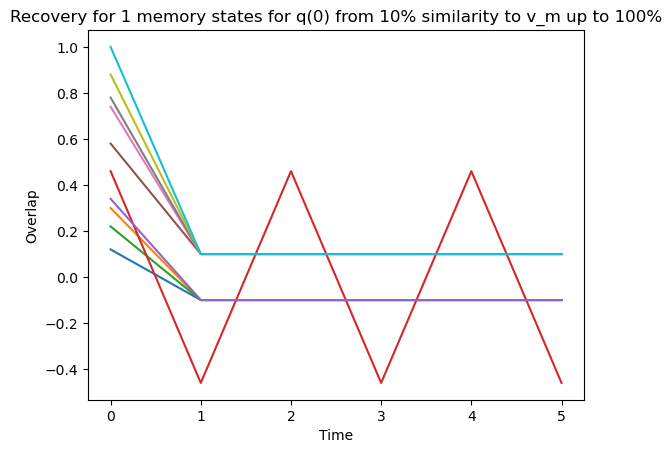

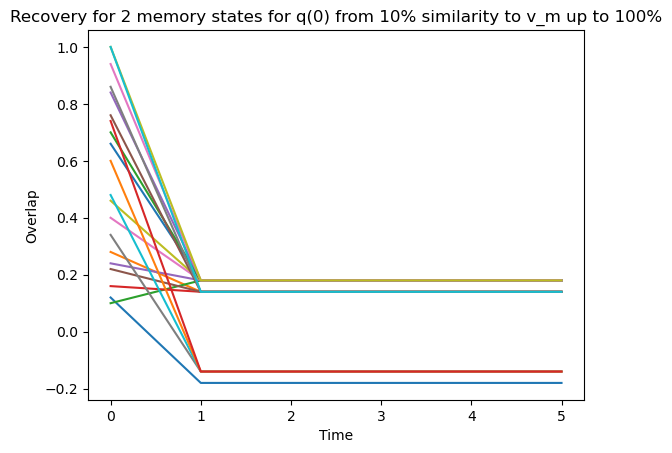

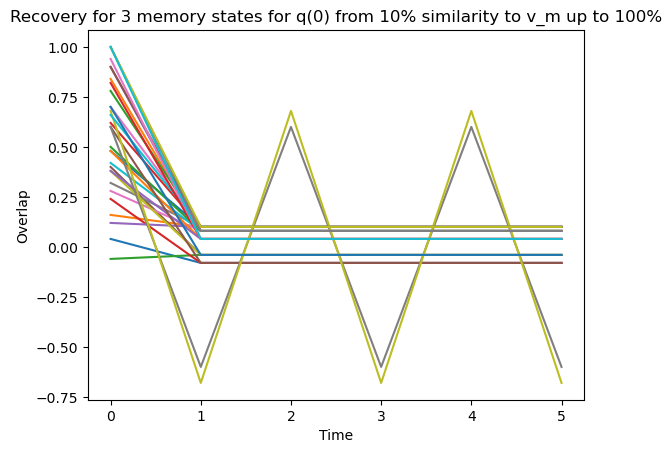

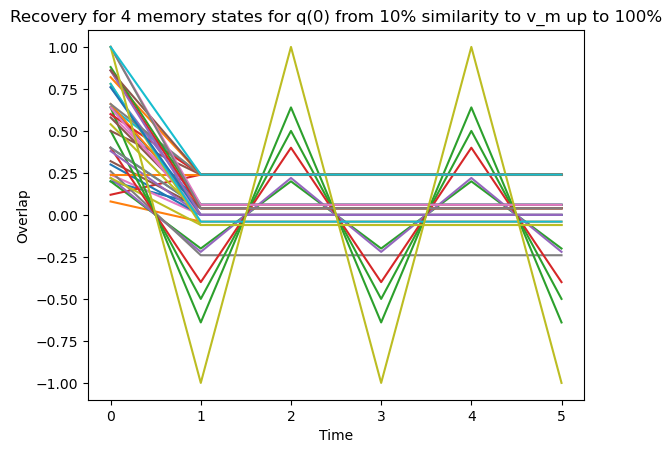

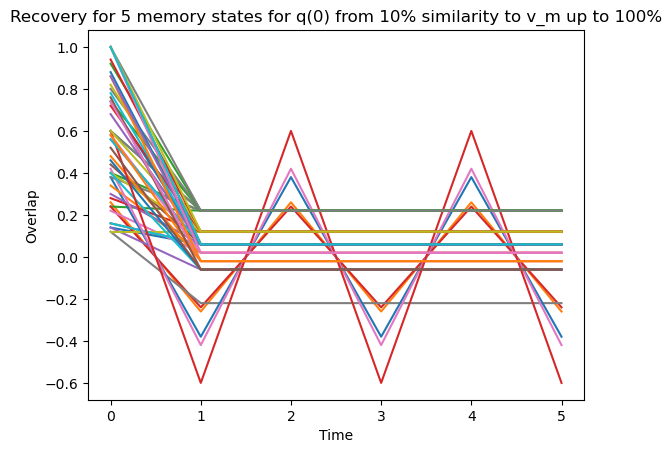

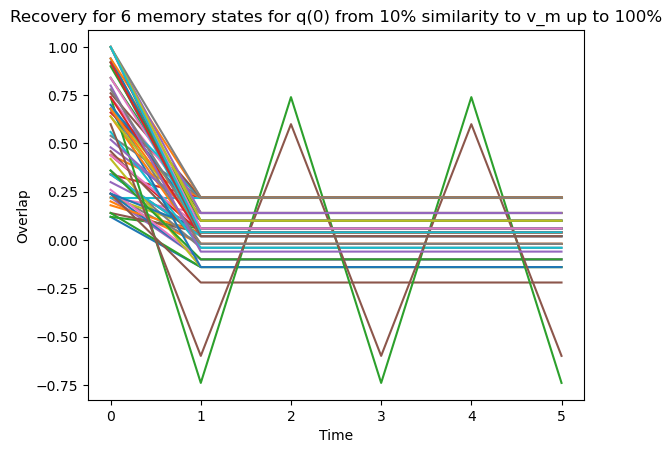

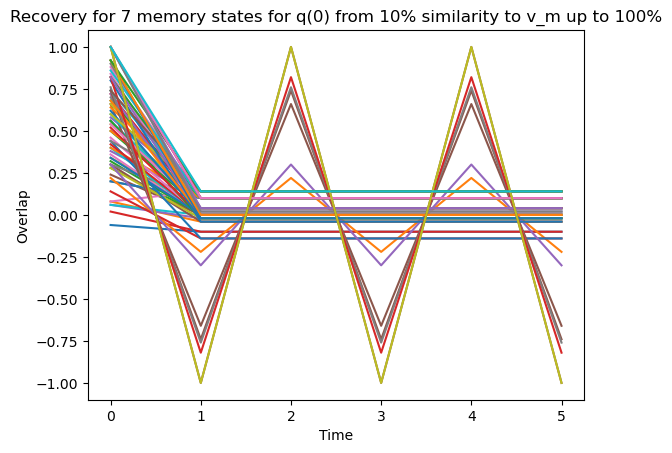

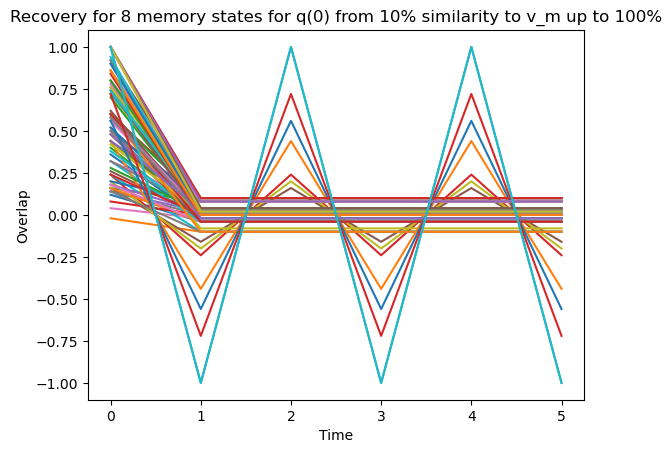

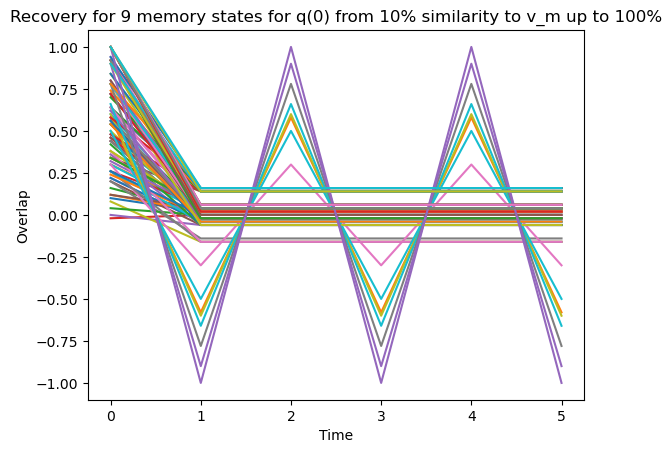

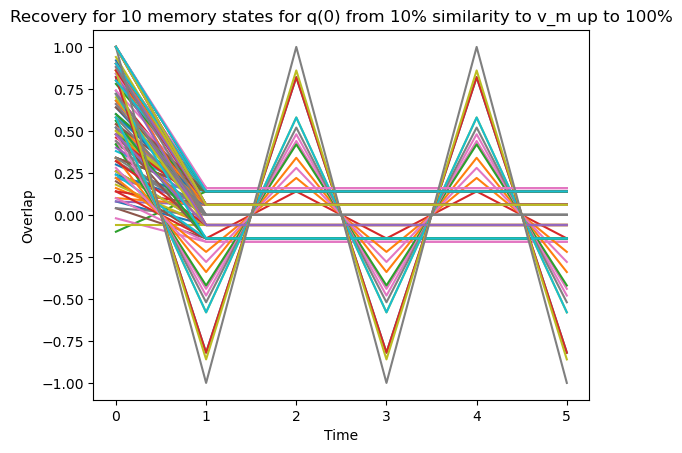

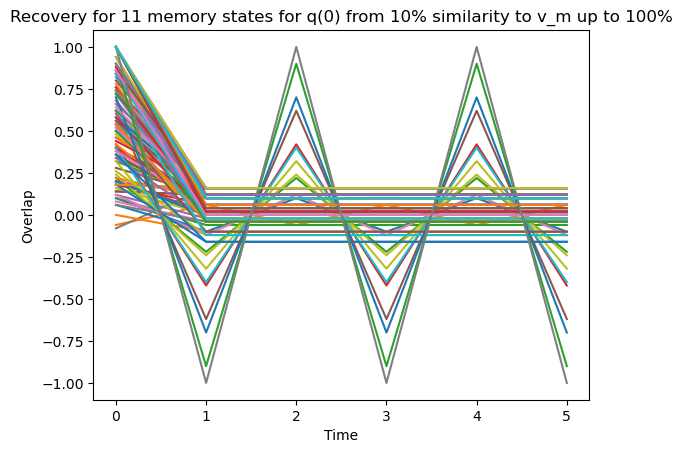

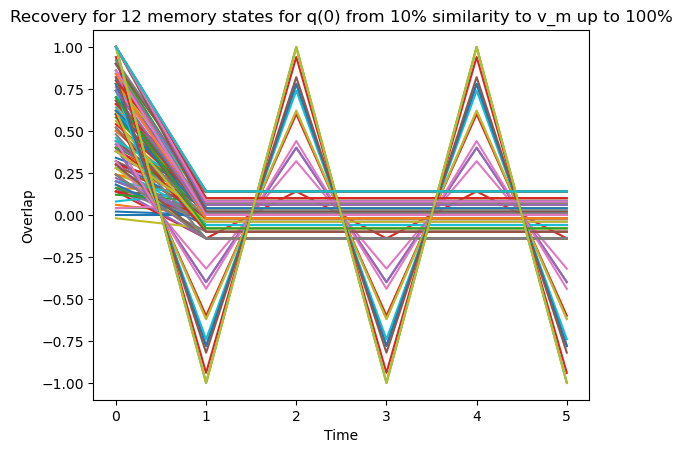

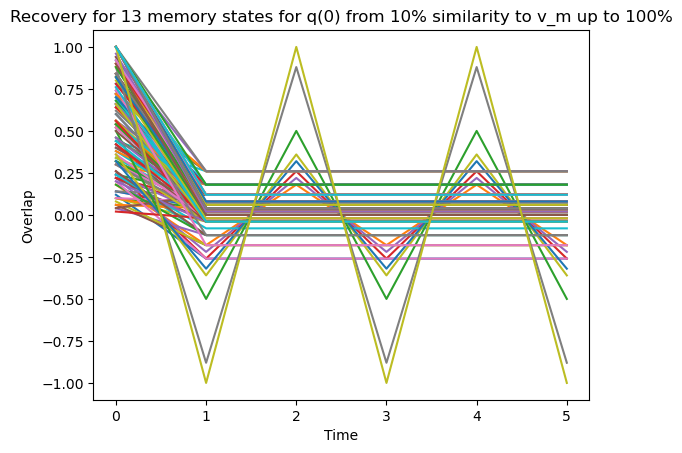

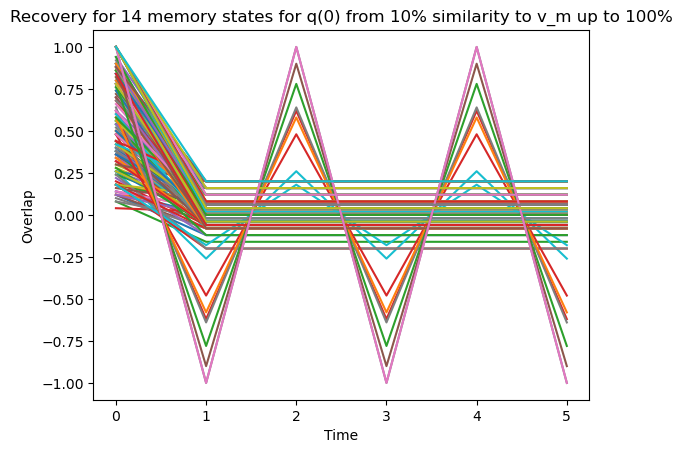

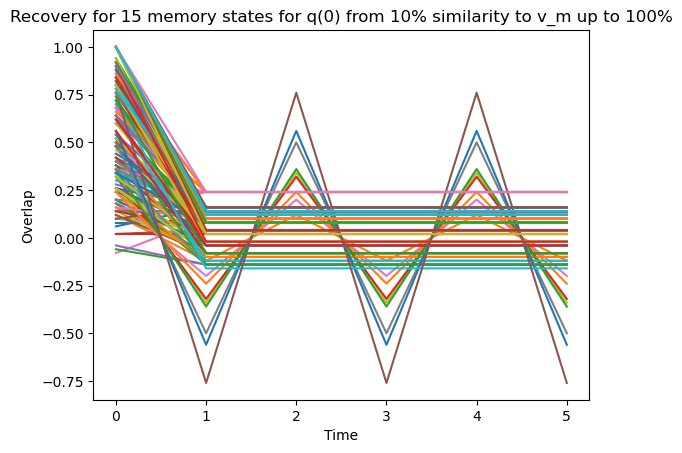

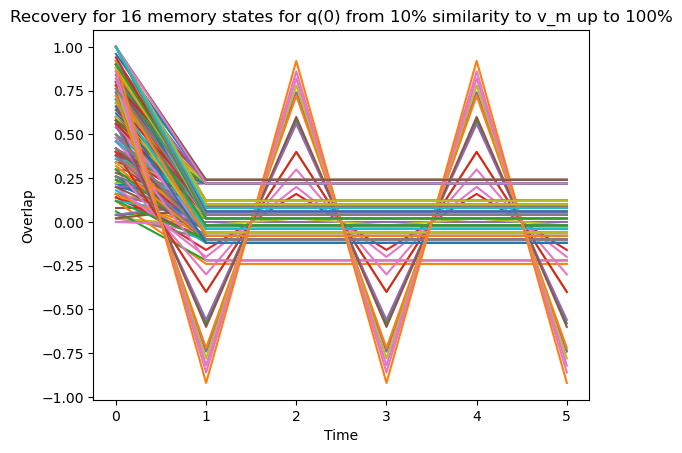

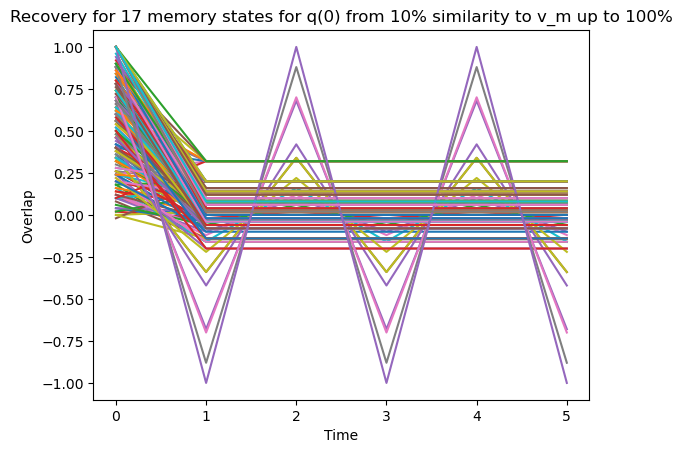

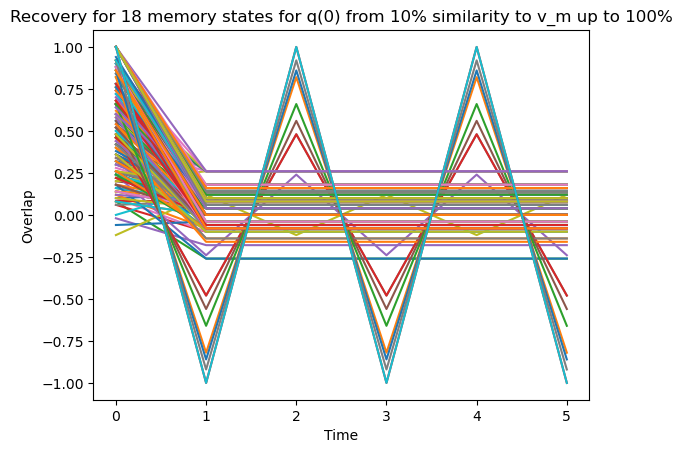

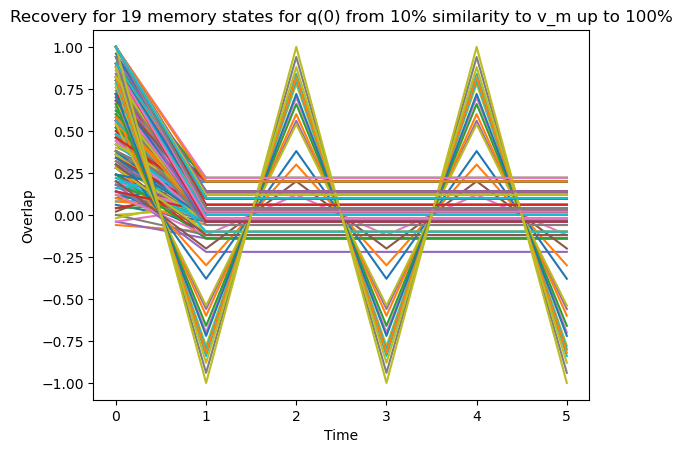

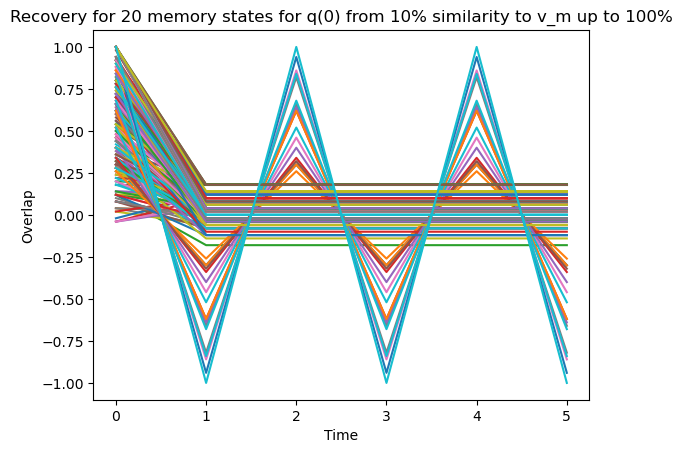

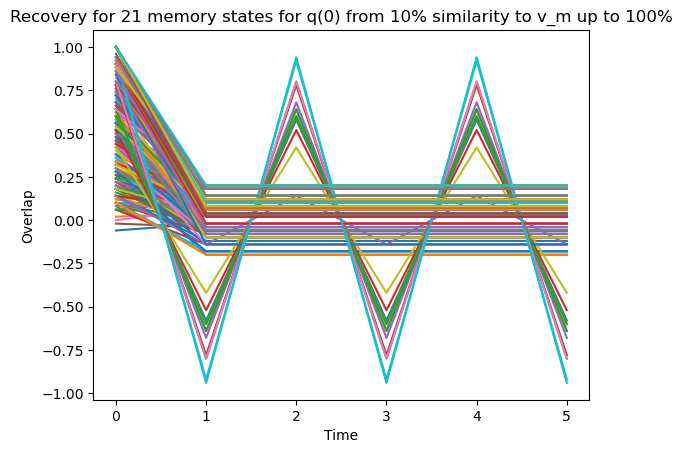

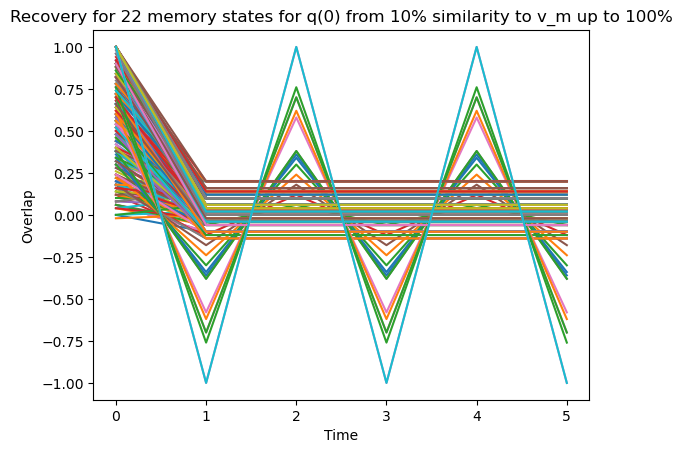

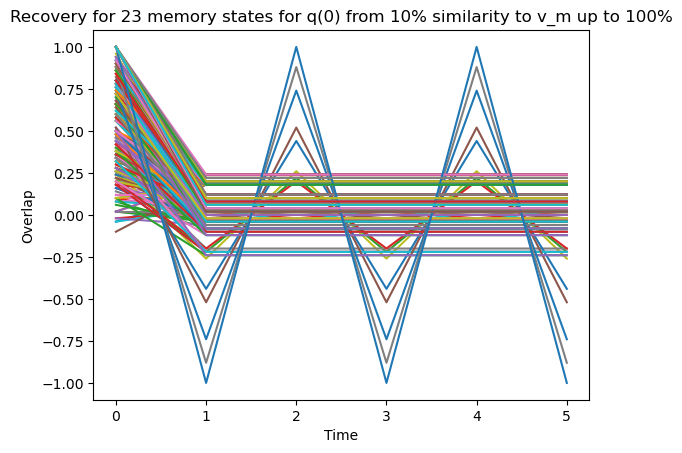

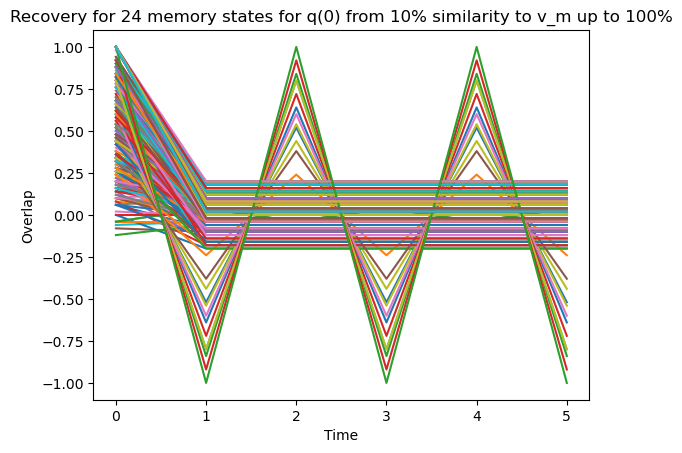

In [82]:
for P in range(1, 25):
    mem_states = np.random.choice([-1, 1], (P,n))
    C = np.zeros((P,P))
    for i in range(P):
        for j in range(P):
            C[i,j] = np.dot(mem_states[i], mem_states[j])
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            M[i, j] = np.sum([mem_states[k] * C[k,l] * mem_states[l] for k in range(P) for l in range(P)])
    M = np.sign((1 - kron)*M)
    for match in np.arange(0.1,1.1,0.1):
        q_ts_pos = []
        V_ts_pos = []
        for v_m in mem_states:
            T = 5
            v_0 = modify_array(v_m, match)
            V_t_pos = np.zeros(shape=(n, T+1))
            V_t_pos[:,0] = v_0
            q_0_pos = np.dot(v_0, v_m) / n
            q_t_pos = np.zeros(T+1)
            q_t_pos[0] = q_0_pos
            for t in range(T):
                V_t_pos[:, t+1] = [np.sign(np.sum([M[i, j]*V_t_pos[j, t] for j in range(n)])) for i in range(n)]
                q_t_pos[t+1] = np.dot(V_t_pos[:, t+1], v_m) / n
            q_ts_pos.append(q_t_pos)
            V_ts_pos.append(V_t_pos)
        for i in range(len(q_ts_pos)):
            plt.plot(q_ts_pos[i])
    plt.title(f"Recovery for {P} memory states for q(0) from 10% similarity to v_m up to 100%")
    plt.xlabel("Time")
    plt.ylabel("Overlap")
    plt.show()

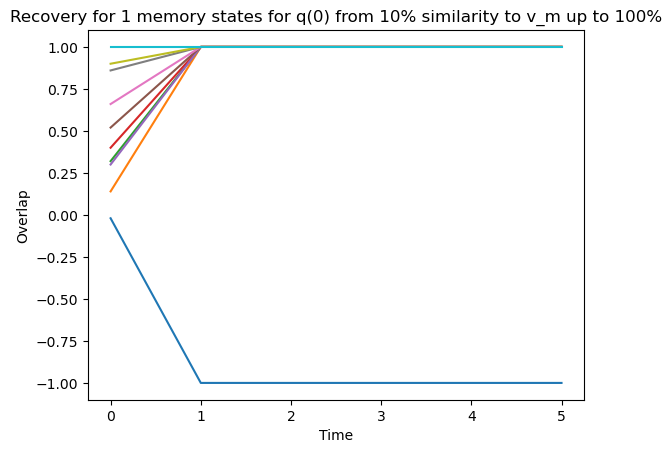

These all appear to fluctuate extremely or converge in the range of -0.25 to 0.25 overlap showing that different weights may lead to loss of memory to some degree due to possibly some neurons, and consequently memory states, being favored over others.